# Part 1

For extracting timestamps, I first made a new dataframe that only had the timestamp column and then exported it to a csv file.

For example:
df_timestamps = df['timestamps']
df_timestamps.to_csv()

# Part 2

For Part 2, I used Professor Wirfs-Brock's timestamp data.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot

In [3]:
timestamps = pd.read_csv('/Users/nikita/Desktop/profWB_timestamps.csv')
timestamps

,Unnamed: 0,timestamp
0,0,2022-11-06T01:53:35Z
1,1,2022-11-06T01:54:37Z
2,2,2022-11-10T19:44:53Z
3,3,2022-11-28T20:30:12Z
4,4,2022-12-01T17:57:23Z
...,...,...
209,209,2023-11-15T18:12:54Z
210,210,2023-11-15T18:14:31Z
211,211,2023-11-15T18:15:59Z
212,212,2023-11-15T22:39:00Z


In [4]:
timestamps.sort_values('timestamp')

,Unnamed: 0,timestamp
0,0,2022-11-06T01:53:35Z
1,1,2022-11-06T01:54:37Z
2,2,2022-11-10T19:44:53Z
3,3,2022-11-28T20:30:12Z
4,4,2022-12-01T17:57:23Z
...,...,...
209,209,2023-11-15T18:12:54Z
210,210,2023-11-15T18:14:31Z
211,211,2023-11-15T18:15:59Z
212,212,2023-11-15T22:39:00Z


In [5]:
timestamps['time_elapsed']=''
for i in range(1,214):
    timestamps['time_elapsed'][i]=pd.Timestamp(timestamps['timestamp'][i])-pd.Timestamp(timestamps['timestamp'][i-1])

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/240942426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timestamps['time_elapsed'][i]=pd.Timestamp(timestamps['timestamp'][i])-pd.Timestamp(timestamps['timestamp'][i-1])


Googled to see if there was an easier way to calculate the difference between Timestamps without turning them into strings and coming up with a whole function myself... Turns out there was!

In [6]:
timestamps

,Unnamed: 0,timestamp,time_elapsed
0,0,2022-11-06T01:53:35Z,
1,1,2022-11-06T01:54:37Z,0 days 00:01:02
2,2,2022-11-10T19:44:53Z,4 days 17:50:16
3,3,2022-11-28T20:30:12Z,18 days 00:45:19
4,4,2022-12-01T17:57:23Z,2 days 21:27:11
...,...,...,...
209,209,2023-11-15T18:12:54Z,0 days 00:01:04
210,210,2023-11-15T18:14:31Z,0 days 00:01:37
211,211,2023-11-15T18:15:59Z,0 days 00:01:28
212,212,2023-11-15T22:39:00Z,0 days 04:23:01


In [7]:
timestamps['time_elapsed'].describe()

count                 214
unique                203
top       0 days 00:00:35
freq                    3
Name: time_elapsed, dtype: object

Question 3: What is the longest time between timestamps? What is the average time between timestamps?

In [8]:
longest_time = timestamps['time_elapsed'][1]
for i in range(1,len(timestamps)):
    if timestamps['time_elapsed'][i]>longest_time:
        longest_time=timestamps['time_elapsed'][i]
longest_time

Timedelta('27 days 17:59:27')

In [9]:
total_time = timestamps['time_elapsed'][1]
for i in range(2,len(timestamps)):
    total_time += timestamps['time_elapsed'][i]
total_time/(len(timestamps)-1)

Timedelta('1 days 18:26:05.596244131')

Question 4: What is the day with the most timestamps? How many events (timestamps) were on that day?

In [10]:
timestamps['day']=''
timestamps['month']=''
timestamps['year']=''
timestamps['date']=''
for i in range(len(timestamps)):
    temp = pd.to_datetime(timestamps['timestamp'][i])
    timestamps['day'][i]=temp.day
    timestamps['month'][i]=temp.month
    timestamps['year'][i]=temp.year
    timestamps['date'][i]=str(temp.month)+'-'+str(temp.day)+'-'+str(temp.year)

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/1756267731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timestamps['day'][i]=temp.day
/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/1756267731.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timestamps['month'][i]=temp.month
/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/1756267731.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [11]:
timestamps['date'].value_counts()

4-6-2023      10
4-21-2023     10
10-24-2023     8
3-13-2023      7
10-5-2023      7
              ..
8-23-2023      1
3-6-2023       1
9-14-2023      1
3-5-2023       1
11-17-2023     1
Name: date, Length: 91, dtype: int64

What is the month with the most timestamps? How many events (timestamps) were on that month?

In [12]:
timestamps['month'].value_counts()

10    45
4     38
2     30
3     23
11    18
12    15
1     14
9     13
5      9
8      4
6      3
7      2
Name: month, dtype: int64

Create at least one visualization of this data:

<AxesSubplot:>

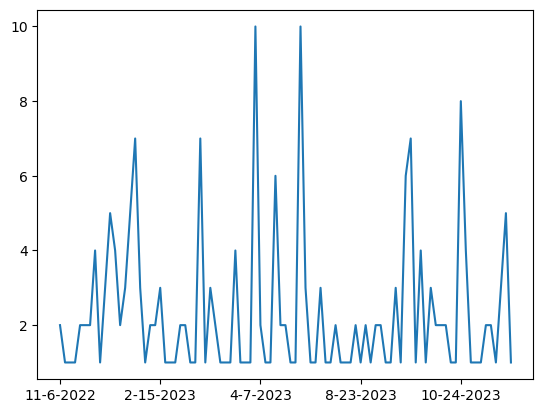

In [13]:
timestamps['date'].value_counts(sort=False).plot()

Looks like activity time was at a high in April and there was a lull in August.

What do you think the source of this data is? Write a few sentences explaining your reasoning, as well as what other data might help you verify if you are correct?

I'm not sure what acitivity this dataset matches up to, I don't know Professor WB enough to know her habits. What would she use for longer stints over the summer and then use less at the beginning of the school year? What would she use 10 times one day and then stop using for a couple of days?
Spotify, Netflix, Google...
It's occuring to me that time of day might be helpful to know as well.

In [35]:
for i in range(len(timestamps)):
    timestamps['timestamp'][i]=pd.Timestamp(timestamps['timestamp'][i])

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/3991700014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timestamps['timestamp'][i]=pd.Timestamp(timestamps['timestamp'][i])


In [41]:
timestamps['hour']=''
for i in range(len(timestamps)):
    timestamps['hour'][i]=timestamps['timestamp'][i].hour

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/3405456196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timestamps['hour'][i]=timestamps['timestamp'][i].hour


<AxesSubplot:>

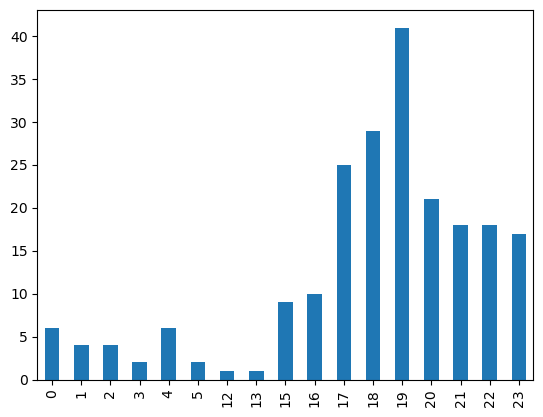

In [63]:
timestamps['hour'].value_counts().sort_index().plot(kind='bar')

So usage doesn't happen between 5-12 at all, so only afternoon and in the wee hours of the morning. 

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/2170215647.py:1: FutureWarning: Inferring timedelta64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=timedelta64[ns])
  timestamps.plot(x='month',y='hour', kind='scatter',alpha=0.5)


<AxesSubplot:xlabel='month', ylabel='hour'>

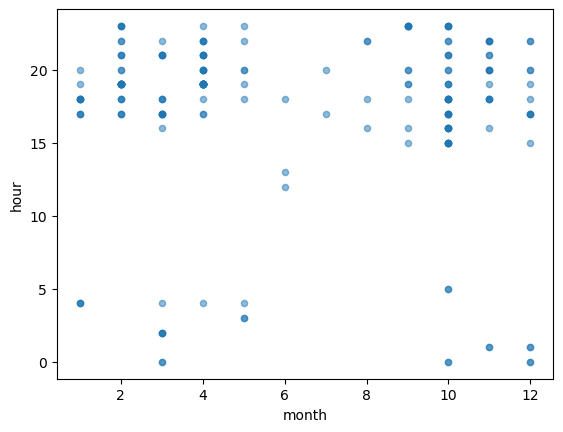

In [102]:
timestamps.plot(x='month',y='hour', kind='scatter',alpha=0.5)

I am going to assume this is some kind of academic thing, maybe a grading platform? Although then I don't think it would be used during the summer. It's only used in the early morning during the school year, though, and grading seems like a thing that could happen at 2 AM. It could be entertainment as well, maybe that makes more sense, that because so much is happening during the schoolyear, Netflix time has to be the early AM.
Edit: just came back and added transparency which is super light over the summer so I feel like it must be something school related.

# Part 3

For Part 3, I used my personal Netflix information, using only the timestamps. 

In [76]:
nikita_netflix = pd.read_csv('/Users/nikita/Desktop/personal data/netflix_timestamps')
nikita_netflix

,Unnamed: 0,Click Utc Ts
0,58,2023-10-08 06:42:13
1,59,2023-10-08 06:42:13
2,60,2023-10-08 06:42:09
3,61,2023-10-08 06:42:09
4,62,2023-10-08 06:42:09
...,...,...
935,993,2023-06-20 23:36:15
936,994,2023-06-20 00:41:04
937,995,2023-06-20 00:41:04
938,996,2023-06-20 00:40:56


In [90]:
for i in range(len(nikita_netflix)):
    nikita_netflix['Click Utc Ts'][i]=pd.Timestamp(nikita_netflix['Click Utc Ts'][i])

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/1604350162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nikita_netflix['Click Utc Ts'][i]=pd.Timestamp(nikita_netflix['Click Utc Ts'][i])


In [116]:
nikita_netflix['time_of_year']=''
nikita_netflix['time_of_day'] = ''
nikita_netflix['month'] = ''
for i in range(len(nikita_netflix)):
    nikita_netflix['time_of_year'][i]=pd.Timestamp(month=nikita_netflix['Click Utc Ts'][i].month, day=(nikita_netflix['Click Utc Ts'][i].day),year=(nikita_netflix['Click Utc Ts'][i].year))
    nikita_netflix['time_of_day'][i]=nikita_netflix['Click Utc Ts'][i].hour + nikita_netflix['Click Utc Ts'][i].minute/60
    nikita_netflix['time_of_day'][i]=nikita_netflix['Click Utc Ts'][i].month

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/2852970245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nikita_netflix['time_of_year'][i]=pd.Timestamp(month=nikita_netflix['Click Utc Ts'][i].month, day=(nikita_netflix['Click Utc Ts'][i].day),year=(nikita_netflix['Click Utc Ts'][i].year))
/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/2852970245.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nikita_netflix['time_of_day'][i]=nikita_netflix['Click Utc Ts'][i].hour + nikita_netflix['Click Utc Ts'][i].minute/60


<AxesSubplot:xlabel='time_of_year', ylabel='time_of_day'>

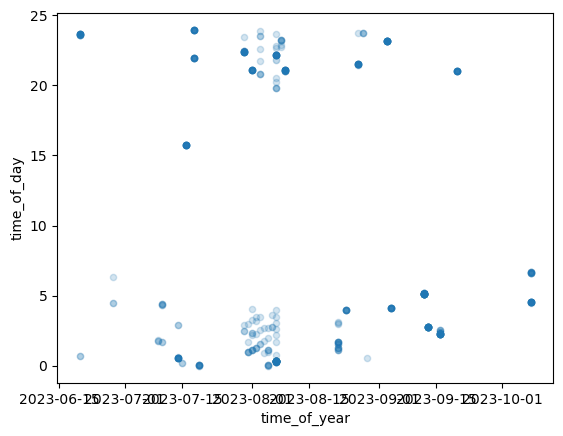

In [117]:
nikita_netflix.plot(x='time_of_year',y='time_of_day', kind='scatter', alpha=0.1)

I feel like I must be reading this wrong or doing something wrong because I've definitely never watched Netflix past maybe 2AM. Certainly not 5AM. Certainly not that regularly.

In [121]:
nikita_netflix['Click Utc Ts'].value_counts()

2023-09-13 02:48:08    18
2023-08-01 21:06:30    16
2023-09-12 05:08:47    16
2023-09-16 02:16:42    15
2023-09-13 02:48:09    14
                       ..
2023-08-08 23:13:35     1
2023-08-08 23:13:02     1
2023-08-05 00:00:11     1
2023-08-07 22:48:54     1
2023-07-30 22:23:44     1
Name: Click Utc Ts, Length: 358, dtype: int64

No idea.

/var/folders/1t/671mxt1x2bj2c4t5bvjchvj80000gn/T/ipykernel_4709/600200640.py:2: FutureWarning: Inferring timedelta64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=timedelta64[ns])
  timestamps.plot(x='month',y='hour', kind='scatter',alpha=0.5)


<AxesSubplot:xlabel='month', ylabel='hour'>

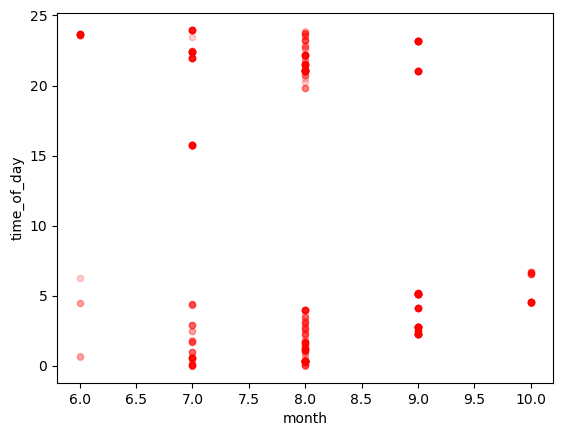

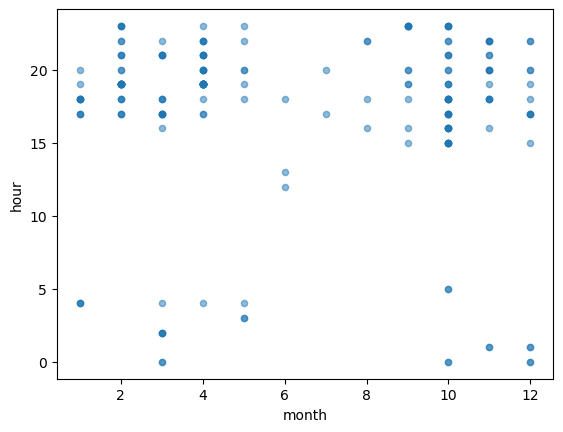

In [124]:
nikita_netflix.plot(x='month',y='time_of_day', kind='scatter', alpha=0.1,color='r')
timestamps.plot(x='month',y='hour', kind='scatter',alpha=0.5)

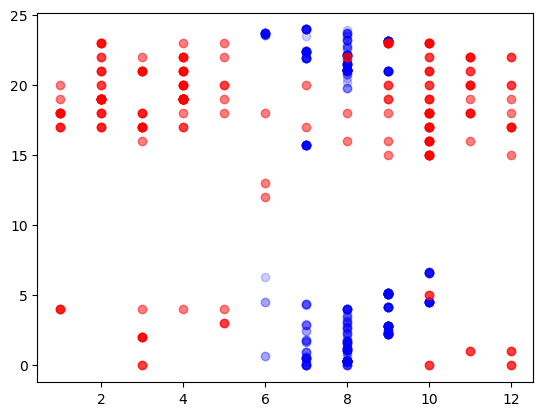

In [128]:
fig=plot.figure()
axis=fig.add_subplot(111)
axis.scatter(x=nikita_netflix['month'],y=nikita_netflix['time_of_day'],alpha=0.1,color='b')
axis.scatter(x=timestamps['month'],y=timestamps['hour'],alpha=0.5, color='r')

I think I would need more of my watch history to really see what's going on, but just the section showing it looks like my watching habits are somewhat inverse of Professor WB's. It could be that mine are just consistent, though, while hers patter out around the summer, early August.

# Part 4

I will abstract what I did for Part 4 without including my personal data.

First I imported my Netflix watch information and made a new dataframe that isolated only my watch information because I share an account with my mom. 

df_nikita = df[df['Profile Name']=='Nikita']

Then I saw that there was a column called 'Supplemental Video Type' that showed whether the content I watched was a movie or show, or was a trailer or hook. I got an idea:

'Okay, I have an idea. So they play those little autotrailers at the end of Netflix right, I'm curious which ones I closed the fastest and which ones I waited out. I feel like when I close them immediately it means that I really liked whatever I watched right before it and so I want to 'pay my respects' by watching the credits.'

I isolated for rows where 'Supplemental Video Type' was .notnull() (null indicated a full movie or tv show episode) and then sorted for duration to see which one I closed the fastest.

Then I went back through and pulled the timestamp for the trailer I closed the fastest to see if I could find what I had been watching directly before. 

It showed that I had been watching a bunch of teaser trailers and hooks successionally so I was probably just surfing through Netflix to try and find what to watch. This was unsatisfyiing so I tried again.

This time, I created a new dataframe with only movies/tv episodes and the hooks that came directly after them by using 
if isnull(df['Supplemental Video Type'].iloc[i]) and notnull(df['Supplemental Video Type'].iloc[i+1]):
If I found a pair, I added it to a list, and at the end turned the list into a new dataframe.

Then I used .sort_values('Duration'), took out a row using row=df.sort_values('Duration').iloc[0] and found it's index position in the original not sorted dataframe using df.index.get_loc(row.name).

Then I found it's pairing using df.iloc[[value,value+1]].

This was a cool way to see what shows I liked the vibes enough of to want to stay in it and not have it be interrupted by the trailer that automatically played after.

I came up with two alternate visualizations as well:

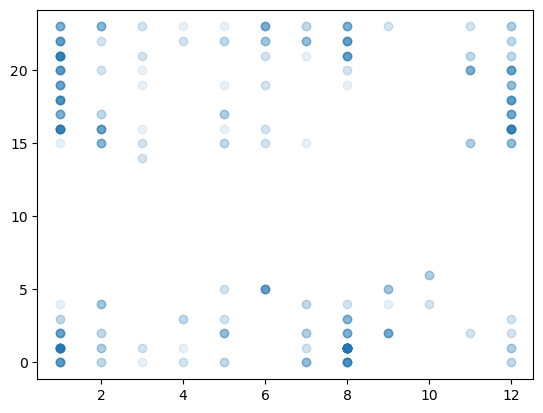
First, I remade the visualization from Parts 1-3 just to make sure I was doing it right and it matched.

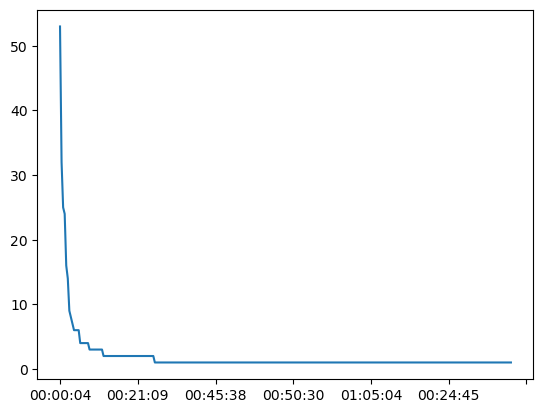
Then I made a visualization using 'Duration.' It was interesting because I didn't realize just how many trailers and hooks I was watching, or watched without really watching because Netflix is constantly playing them.